# 机器学习 作业2

吴宇航 31520201153897

## 第一题：

## 第二题：

### 重构框架：
重构后的框架分为四个模块： 

- **datasets** 
    数据集模块，每种数据集对应一个类，提供从数据集里获取数据的API
- **models** 
    模型模块，每种模型对应一个类，包含基本的初始化、拟合、训练
- **utils** 
    工具模块，包括基本的dataloader、数据预处理等工具
- **mocks** 
    模拟模块，提供各种带有噪声的数据，如生成基于三角函数的模拟数据

### dataset MNIST 类 介绍：

主要有以下方法：

```python
def __init__(self,path:str,typer:str="train"):
    ''' 实例化 MNIST类, 需要提供MNIST所在的文件夹路径 '''
def _get_image(self,buff,index:int,row:int,col:int)
	''' 从比特字符串缓存中读取一张图片 '''
def _image_parser(self,path:str,file:str)
	''' 从比特字符串缓存中读取头信息和所有图片 '''
def _label_parser(self,path:str,file:str)
	''' 从比特字符串缓存中读取所有标签 '''
def __getitem__(self, index:int)
	''' 获取指定 index 的图片标签对 '''
def __len__(self)
	''' 获取数据集数量 '''
```

### 使用样例：

In [1]:
import os
import sys
import numpy as np
import struct
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd()))
from Framework import datasets, models, utils

In [2]:
MNIST_PATH="/home/wuyuhang/datasets/mnist"

label is:  1


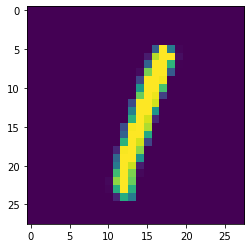

In [3]:
mnist=datasets.MNIST(path=MNIST_PATH,typer="valid")
img,label=mnist.__getitem__(5)
print("label is: ",label)
plt.imshow(img)
plt.show()

## 第三题：


## 第四题：

### 直线拟合的方法：

1. 最小二乘法
2. 霍夫变换
3. RANSAC 随机抽样一致算法

### 最小二乘法

设直线方程 $ y=k*x+b $ 

**损失定义**：$$ Loss=\sum_{i=1}^{n}(\widehat{y_i}-y_i)^2 $$

#### 优缺点：

**优势**：简单清晰，运算方便

**缺点**：
  1. 无法拟合垂直线，越接近垂直线效果越差
  2. 每个点的权重相同，受噪声、离群点影响大

### 霍夫变换

霍夫变换常用于图像处理中，是从图像中识别几何形状的基本方法之一。

**基本原理**：用点与线的对偶性，将原始图像空间中的给定曲线通过曲线表达形式变为参数空间的一个点。将原始图像中的曲线检测问题转化成寻找参数空间中的峰值问题。具体到直线拟合中，设待检测直线方程为y=k*x+b, 则对于某数据点 $ (x_0,y_0)$ 有：

$$
b=x_0\ k-y_0
$$

即每个数据点映射到参数空间后都对应着一条直线，N个数据点就有N条直线，那么参数空间中距这些直线最近的点，就是拟合直线的参数。

在实际应用中，因为 $ y=k*x+b $ 形式的直线方程无法表示 $ x=c $ 形式的直线，所以采用极坐标系$(p,\theta )$下的参数方程 $ p=x*cos(\theta )+y*sin(\theta ) $ 进行拟合

**算法流程**：
1. 给定一个参数范围，如 $[ \rho_1 , \rho_2 ]$ , $[\theta_1 , \theta_2]$
2. 按给定步长遍历参数范围，对每个参数对 $[\rho_i,\theta_i]$：
  - 遍历所有数据点，对每个数据点 $[x_j,y_j]$ :
  - 构造直线方程 $\rho = x_j*cos(\theta_i )+y_j*sin(\theta_i ) $：
  - 若 $Loss(\rho_i,\rho)$ 的误差小于阈值，则给这个参数对投一票
3. 在完成所有遍历后，取得票最高的参数对作为拟合直线

#### 优缺点：

**优点**：相较于最小二乘法，霍夫变换可以在多种信号混杂的情况下提取特定模式的信号

**缺点**：
  1. 算法的精确性取决于步长大小，步长大则效果差，但步长小又难以找到峰值
  2. 每个数据点的权重相同，模型容易受噪声影响

### RANSAC

**基本假设**：样本中包含正确数据，也包含异常数据，即数据集中含有噪声。

**算法流程**：
1. 在数据中随机均匀的选择几个点作为内群点
   - 拟合选择的内群点
2. 将其他点代入拟合的模型，通过阈值threshold判断是否为内群
   - 如果是，则加入内群，并重新拟合
3. 记录最终内群点数量
4. 重复1-3步骤多次
5. 比较哪次迭代中内群点数量最多，最多内群点所拟合的模型就是我们所要求的解

#### 优缺点：

**优点**：算法稳定性好，可以有效避免离群点噪声干扰

**缺点**：
1. 迭代次数无明确上限；需要设置迭代次数上限，但所得结果可能不是最优结果
2. 只能从特定数据集中估计出一个模型，如果存在多个模型，RANSAC不能找到别的模型